# **Yellow Taxi Trip Data 2017 - Data Analysis and Predictive Modeling**
---

### **Objective**
Analyze, preprocess, and build predictive models for the Yellow Taxi Trip Data 2017 dataset, focusing on fare prediction and trip pattern analysis.

---

### **1. Import Libraries**
```python
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from autoviml.Auto_ViML import Auto_ViML

# Other Utilities
import warnings
warnings.filterwarnings("ignore")


In [13]:


!pip install --upgrade pycaret scikit-learn dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.9 MB/s eta 0:00:00
   ━

In [2]:
# Install all required libraries for the project
!pip install pandas numpy scikit-learn matplotlib seaborn ydata-profiling sweetviz autoviz


In [3]:
from google.colab import files

# Step 1: Upload Kaggle API token
print("Please upload your kaggle.json file (API token from Kaggle):")
files.upload()  # Prompt to upload kaggle.json

# Step 2: Configure Kaggle API
# Create Kaggle directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download Yellow Taxi Trip Data 2017 dataset
!kaggle datasets download -d helddata/yellow-taxi-trip-data-2017 -p ./

# Step 4: Extract the downloaded dataset
!unzip ./yellow-taxi-trip-data-2017.zip -d ./yellow_taxi_data/

# Step 5: Confirmation
print("Yellow Taxi Trip Data 2017 dataset downloaded and extracted successfully!")


Please upload your kaggle.json file (API token from Kaggle):


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/helddata/yellow-taxi-trip-data-2017
License(s): apache-2.0
yellow-taxi-trip-data-2017.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./yellow-taxi-trip-data-2017.zip
replace ./yellow_taxi_data/C2_2017_Yellow_Taxi_Trip_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./yellow_taxi_data/C2_2017_Yellow_Taxi_Trip_Data.csv  
Yellow Taxi Trip Data 2017 dataset downloaded and extracted successfully!


In [4]:
# Import necessary libraries

# Data manipulation and analysis
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical computations

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler  # Feature scaling and encoding
from sklearn.impute import SimpleImputer, KNNImputer  # Handle missing data

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score  # Splitting data and cross-validation

# Regression models
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                               IsolationForest, VotingRegressor)  # Ensemble models for regression and anomaly detection

# Clustering
from sklearn.cluster import KMeans, DBSCAN  # Clustering algorithms (KMeans, DBSCAN)

# Dimensionality reduction
from sklearn.decomposition import PCA  # Principal Component Analysis for reducing feature dimensions

# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression  # Feature selection for the best predictors

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score  # Evaluate regression model performance

# Visualization
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # Advanced visualization for data analysis

# Automated EDA tools
from ydata_profiling import ProfileReport  # Generate detailed profiling reports of datasets
import sweetviz as sv  # Automated data visualization and reporting
from autoviz.AutoViz_Class import AutoViz_Class  # Automated exploratory data visualization

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [5]:

import pandas as pd
import os

# Define the folder containing the dataset
folder_path = './yellow_taxi_data/'  # Folder where dataset is extracted

# Search for the CSV file within the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        break
else:
    raise FileNotFoundError(f"No CSV file found in {folder_path}. Please ensure the data has been downloaded and extracted correctly.")

# Load the data
print("Loading data...")
datetime_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df = pd.read_csv(file_path, parse_dates=datetime_cols)

# Basic Dataset Information
print("\nBasic Dataset Information:")
print("-" * 50)
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Basic Statistics
print("\nNumerical Statistics:")
print(df.describe())


Loading data...

Basic Dataset Information:
--------------------------------------------------
Shape: (22699, 18)

Columns: ['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

Data Types:
 Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64


##Initial Visualizations


Creating initial visualizations...


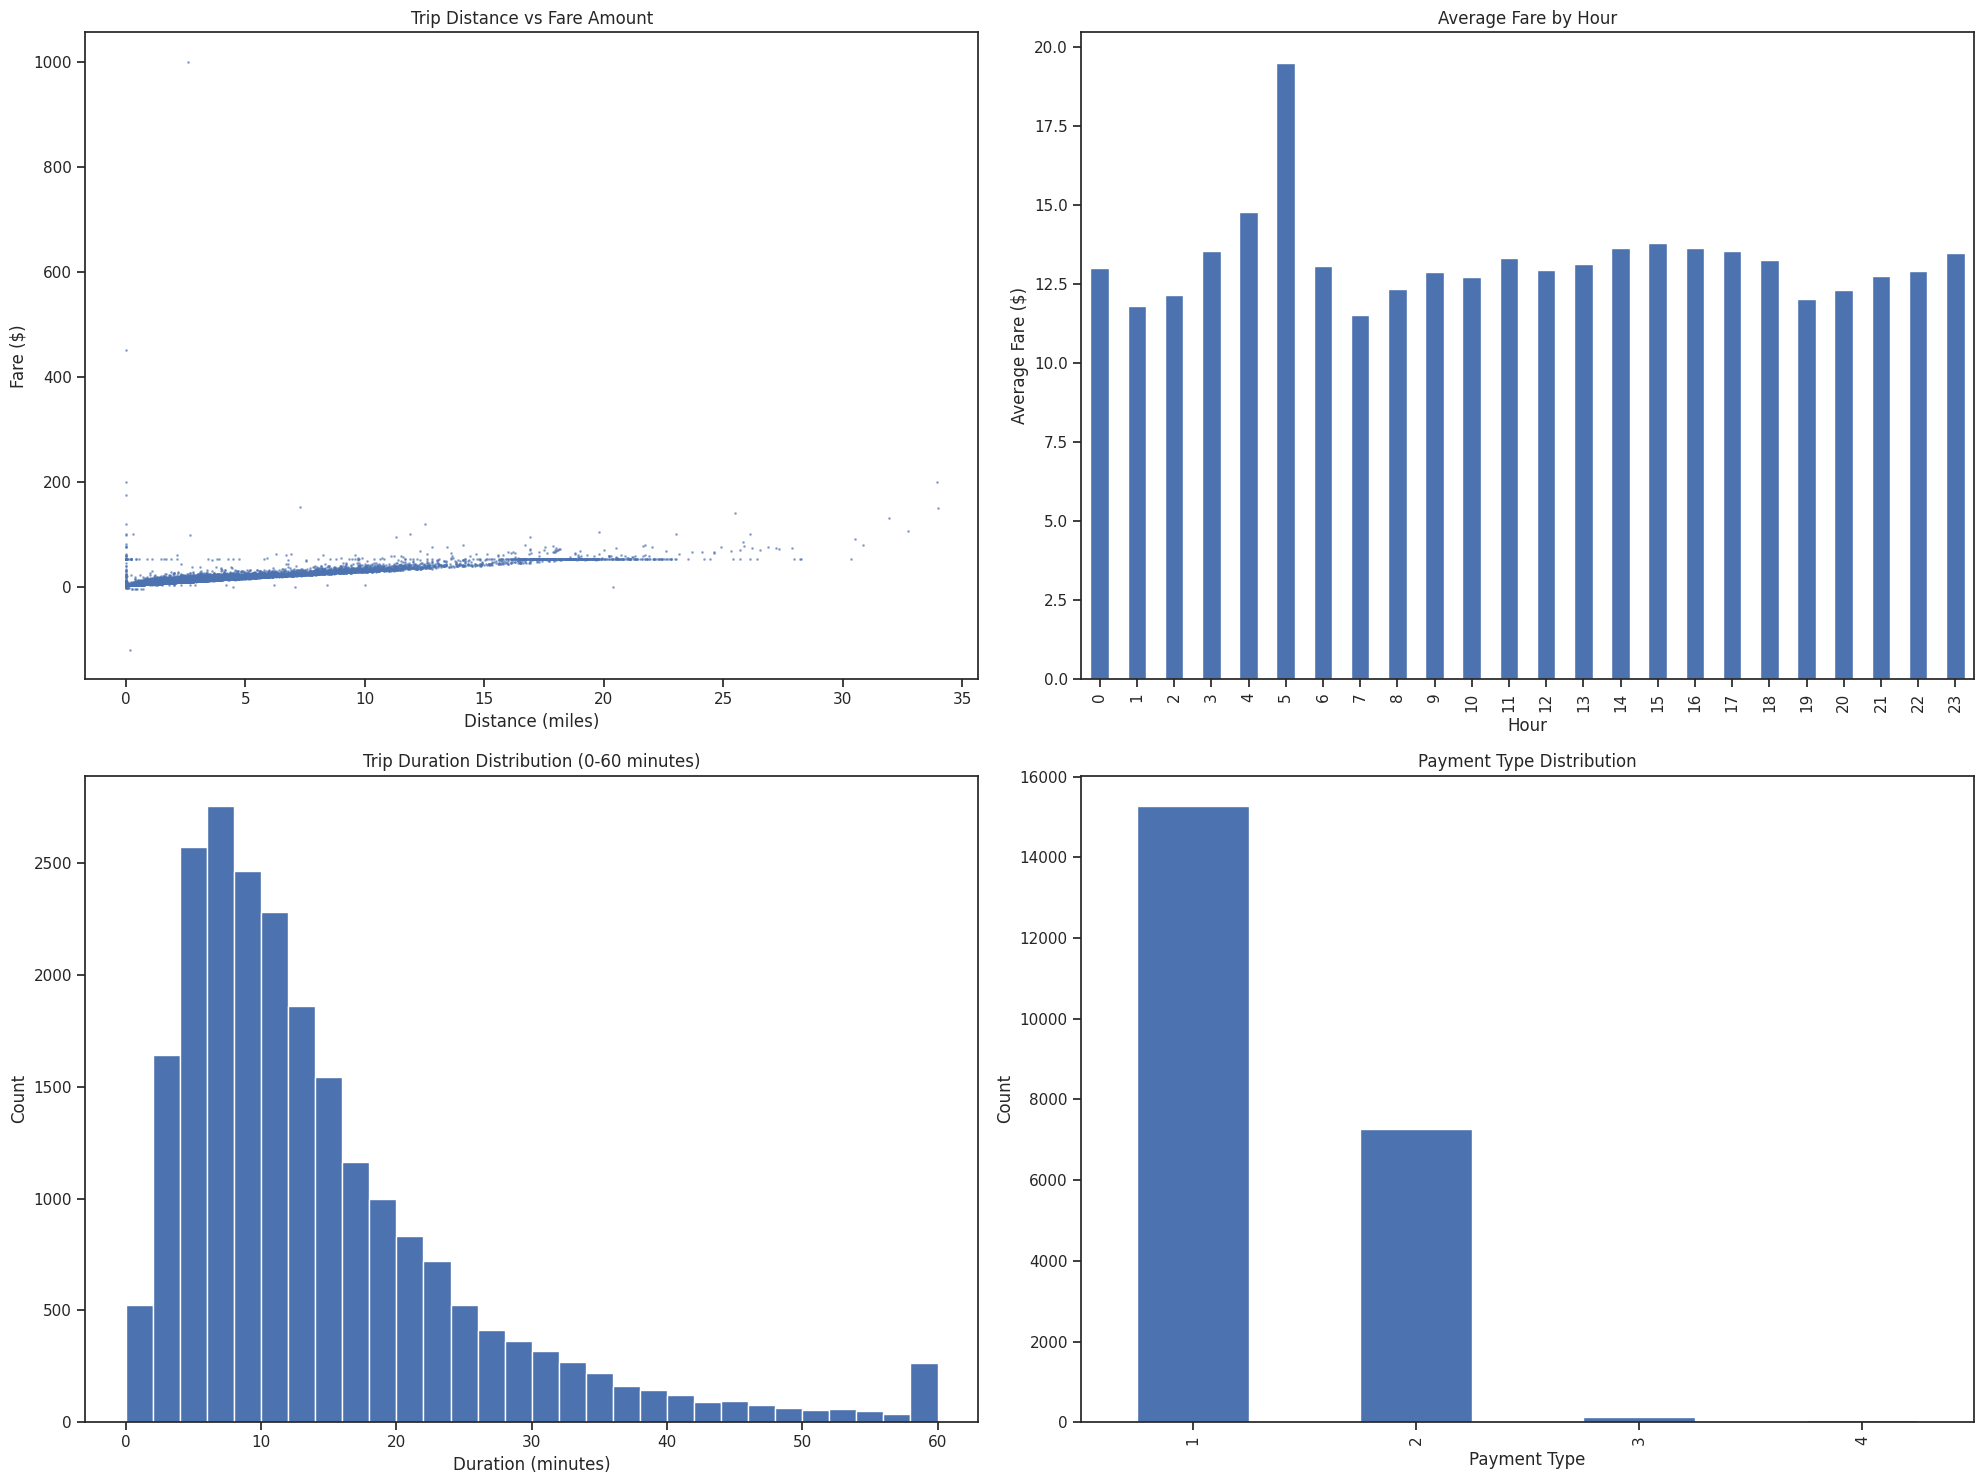

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
print("\nCreating initial visualizations...")

# Set up the figure
plt.figure(figsize=(20, 15))

# 1. Trip distance vs fare amount
plt.subplot(2, 2, 1)
plt.scatter(df['trip_distance'], df['fare_amount'], alpha=0.5, s=1)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare ($)')

# 2. Average fare by hour
plt.subplot(2, 2, 2)
hourly_fares = df.groupby(df['tpep_pickup_datetime'].dt.hour)['fare_amount'].mean()
hourly_fares.plot(kind='bar')
plt.title('Average Fare by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Fare ($)')

# 3. Trip duration distribution
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.subplot(2, 2, 3)
plt.hist(df['trip_duration'].clip(0, 60), bins=30)
plt.title('Trip Duration Distribution (0-60 minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

# 4. Payment type distribution
plt.subplot(2, 2, 4)
df['payment_type'].value_counts().plot(kind='bar')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


##Data Preprocessing and Feature Engineering:

In [7]:

print("\nStarting data preprocessing...")

# Create a copy of the dataframe
df_processed = df.copy()

# 1. Calculate trip duration and speed
df_processed['trip_duration'] = (df_processed['tpep_dropoff_datetime'] -
                                 df_processed['tpep_pickup_datetime']).dt.total_seconds() / 60
df_processed['average_speed'] = np.where(
    df_processed['trip_duration'] > 0,
    df_processed['trip_distance'] / (df_processed['trip_duration'] / 60),
    0
)

# 2. Create time-based features
df_processed['pickup_hour'] = df_processed['tpep_pickup_datetime'].dt.hour
df_processed['pickup_day'] = df_processed['tpep_pickup_datetime'].dt.day
df_processed['pickup_month'] = df_processed['tpep_pickup_datetime'].dt.month
df_processed['pickup_dayofweek'] = df_processed['tpep_pickup_datetime'].dt.dayofweek
df_processed['is_weekend'] = df_processed['pickup_dayofweek'].isin([5, 6]).astype(int)

# 3. Remove invalid or extreme values
print("Removing invalid or extreme values...")
df_processed = df_processed[df_processed['trip_distance'] >= 0]
df_processed = df_processed[df_processed['fare_amount'] >= 0]
df_processed = df_processed[df_processed['trip_duration'] >= 0]

for col in ['trip_distance', 'fare_amount', 'trip_duration']:
    q1 = df_processed[col].quantile(0.01)
    q3 = df_processed[col].quantile(0.99)
    df_processed = df_processed[
        (df_processed[col] >= q1) &
        (df_processed[col] <= q3)
    ]

# 4. Create additional features
df_processed['fare_per_mile'] = np.where(
    df_processed['trip_distance'] > 0,
    df_processed['fare_amount'] / df_processed['trip_distance'],
    0
)
df_processed['fare_per_minute'] = np.where(
    df_processed['trip_duration'] > 0,
    df_processed['fare_amount'] / df_processed['trip_duration'],
    0
)

# 5. Encode categorical variables
print("Encoding categorical variables...")
le = LabelEncoder()
categorical_cols = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']

for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col].astype(str))
    else:
        print(f"Warning: Column {col} not found in the dataset. Skipping encoding.")

# 6. Scale numerical features
print("Scaling numerical features...")
scaler = RobustScaler()
numerical_cols = ['trip_distance', 'trip_duration', 'average_speed',
                  'fare_per_mile', 'fare_per_minute']
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

# Print results
print(f"\nShape after preprocessing: {df_processed.shape}")
print("\nSample of preprocessed data:")
print(df_processed.head())
print("\nNew features created:", df_processed.columns.tolist())



Starting data preprocessing...
Removing invalid or extreme values...
Encoding categorical variables...
Scaling numerical features...

Shape after preprocessing: (21637, 31)

Sample of preprocessed data:
   Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114      2    2017-03-25 08:55:43   2017-03-25 09:09:47    
1    35634249      1    2017-04-11 14:53:28   2017-04-11 15:19:58    
2   106203690      1    2017-12-15 07:26:56   2017-12-15 07:34:08    
3    38942136      2    2017-05-07 13:17:59   2017-05-07 13:48:14    
4    30841670      2    2017-04-15 23:32:20   2017-04-15 23:49:03    

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0         6           0.882653          1              N           
1         1           0.096939          1              N           
2         1          -0.311224          1              N           
3         1           1.066327          1              N           
4         1           1.408163     

#Clustering and Anomaly Detection:


Performing clustering and anomaly detection...
Performing K-means clustering...
Performing anomaly detection with Isolation Forest...


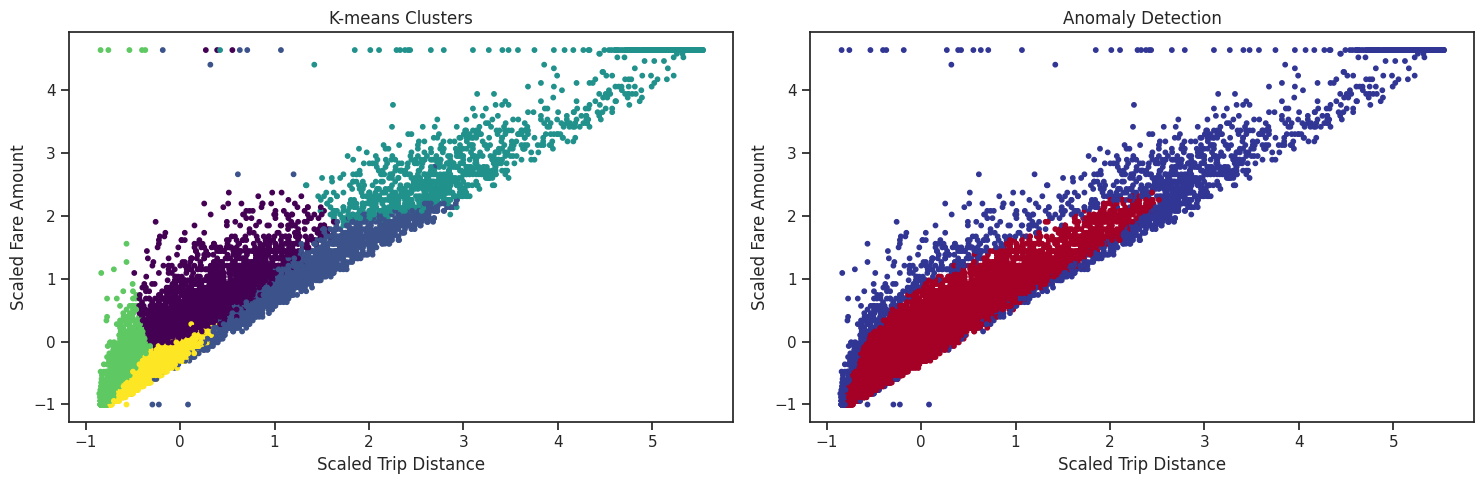


Clustering and anomaly detection completed.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

print("\nPerforming clustering and anomaly detection...")
df_preprocessed = df_processed.copy()
# Select features for clustering
cluster_features = ['trip_distance', 'fare_amount', 'trip_duration', 'average_speed', 'fare_per_mile']
X = df_preprocessed[cluster_features].copy()

# Handle any remaining infinite or missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. K-means clustering
print("Performing K-means clustering...")
kmeans = KMeans(n_clusters=5, random_state=42)
df_preprocessed['cluster'] = kmeans.fit_predict(X_scaled)

# 2. Anomaly detection
print("Performing anomaly detection with Isolation Forest...")
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df_preprocessed['is_anomaly'] = iso_forest.fit_predict(X_scaled)
df_preprocessed['is_anomaly'] = df_preprocessed['is_anomaly'].map({1: 0, -1: 1})  # 1 for anomaly

# Visualize clusters and anomalies
plt.figure(figsize=(15, 5))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_preprocessed['cluster'], cmap='viridis', s=10)
plt.title('K-means Clusters')
plt.xlabel('Scaled Trip Distance')
plt.ylabel('Scaled Fare Amount')

# Plot anomalies
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_preprocessed['is_anomaly'], cmap='RdYlBu', s=10)
plt.title('Anomaly Detection')
plt.xlabel('Scaled Trip Distance')
plt.ylabel('Scaled Fare Amount')

plt.tight_layout()
plt.show()

print("\nClustering and anomaly detection completed.")



#Feature Selection and Preparation:

In [9]:

def prepare_features(df):
    """
    Select and prepare features for modeling
    """
    print("\nPreparing features for modeling...")

    # Select features for modeling
    features = [
        'trip_distance', 'trip_duration', 'pickup_hour', 'pickup_dayofweek',
        'average_speed', 'fare_per_mile', 'fare_per_minute', 'is_weekend',
        'VendorID_encoded', 'RatecodeID_encoded', 'payment_type_encoded',
        'cluster', 'is_anomaly'
    ]

    # Prepare X and y
    X = df[features]
    y = df['fare_amount']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature selection using SelectKBest
    selector = SelectKBest(score_func=f_regression, k=10)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Get selected feature names
    selected_features = [features[i] for i in selector.get_support(indices=True)]
    print("\nSelected features:", selected_features)

    return X_train_selected, X_test_selected, y_train, y_test, selected_features

# Prepare features
# Assign the result to df_clustered
df_clustered = df_preprocessed.copy()
X_train, X_test, y_train, y_test, selected_features = prepare_features(df_clustered)


Preparing features for modeling...

Selected features: ['trip_distance', 'trip_duration', 'average_speed', 'fare_per_mile', 'fare_per_minute', 'is_weekend', 'RatecodeID_encoded', 'payment_type_encoded', 'cluster', 'is_anomaly']


#Build Multiple Models:

In [10]:
def build_multiple_models(X_train, X_test, y_train, y_test):
    """
    Build and evaluate multiple models
    """
    print("\nBuilding and evaluating multiple models...")

    # Initialize models
    models = {
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Ensemble': VotingRegressor([
            ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
        ])
    }

    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_r2 = r2_score(y_test, y_pred_test)

        # Cross-validation scores
        cv_scores = cross_val_score(model, X_train, y_train,
                                  cv=5, scoring='neg_root_mean_squared_error')
        cv_rmse = -cv_scores
        results[name] = {
            'model': model,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'test_r2': test_r2,
            'cv_rmse_mean': cv_rmse.mean(),
            'cv_rmse_std': cv_rmse.std()
        }

        # Print results
        print(f"\n{name} Results:")
        print(f"Train RMSE: ${train_rmse:.2f}")
        print(f"Test RMSE: ${test_rmse:.2f}")
        print(f"Test R² Score: {test_r2:.3f}")
        print(f"CV RMSE: ${cv_rmse.mean():.2f} ± ${cv_rmse.std():.2f}")

    return results

# Build and evaluate models
model_results = build_multiple_models(X_train, X_test, y_train, y_test)
def build_multiple_models(X_train, X_test, y_train, y_test):
    """
    Build and evaluate multiple models
    """
    print("\nBuilding and evaluating multiple models...")

    # Initialize models
    models = {
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Ensemble': VotingRegressor([
            ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
        ])
    }

    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_r2 = r2_score(y_test, y_pred_test)

        # Cross-validation scores
        cv_scores = cross_val_score(model, X_train, y_train,
                                  cv=5, scoring='neg_root_mean_squared_error')
        cv_rmse = -cv_scores

        results[name] = {
            'model': model,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'test_r2': test_r2,
            'cv_rmse_mean': cv_rmse.mean(),
            'cv_rmse_std': cv_rmse.std()
        }

        # Print results
        print(f"\n{name} Results:")
        print(f"Train RMSE: ${train_rmse:.2f}")
        print(f"Test RMSE: ${test_rmse:.2f}")
        print(f"Test R² Score: {test_r2:.3f}")
        print(f"CV RMSE: ${cv_rmse.mean():.2f} ± ${cv_rmse.std():.2f}")

    return results

# Build and evaluate models
model_results = build_multiple_models(X_train, X_test, y_train, y_test)



Building and evaluating multiple models...

Training RandomForest...

RandomForest Results:
Train RMSE: $0.22
Test RMSE: $0.34
Test R² Score: 0.999
CV RMSE: $0.63 ± $0.28

Training GradientBoosting...

GradientBoosting Results:
Train RMSE: $0.44
Test RMSE: $0.51
Test R² Score: 0.997
CV RMSE: $0.59 ± $0.13

Training Ensemble...

Ensemble Results:
Train RMSE: $0.27
Test RMSE: $0.37
Test R² Score: 0.998
CV RMSE: $0.54 ± $0.20

Building and evaluating multiple models...

Training RandomForest...

RandomForest Results:
Train RMSE: $0.22
Test RMSE: $0.34
Test R² Score: 0.999
CV RMSE: $0.63 ± $0.28

Training GradientBoosting...

GradientBoosting Results:
Train RMSE: $0.44
Test RMSE: $0.51
Test R² Score: 0.997
CV RMSE: $0.59 ± $0.13

Training Ensemble...

Ensemble Results:
Train RMSE: $0.27
Test RMSE: $0.37
Test R² Score: 0.998
CV RMSE: $0.54 ± $0.20


#Visualize Model Performance and Feature Importance:


Creating model performance visualizations...


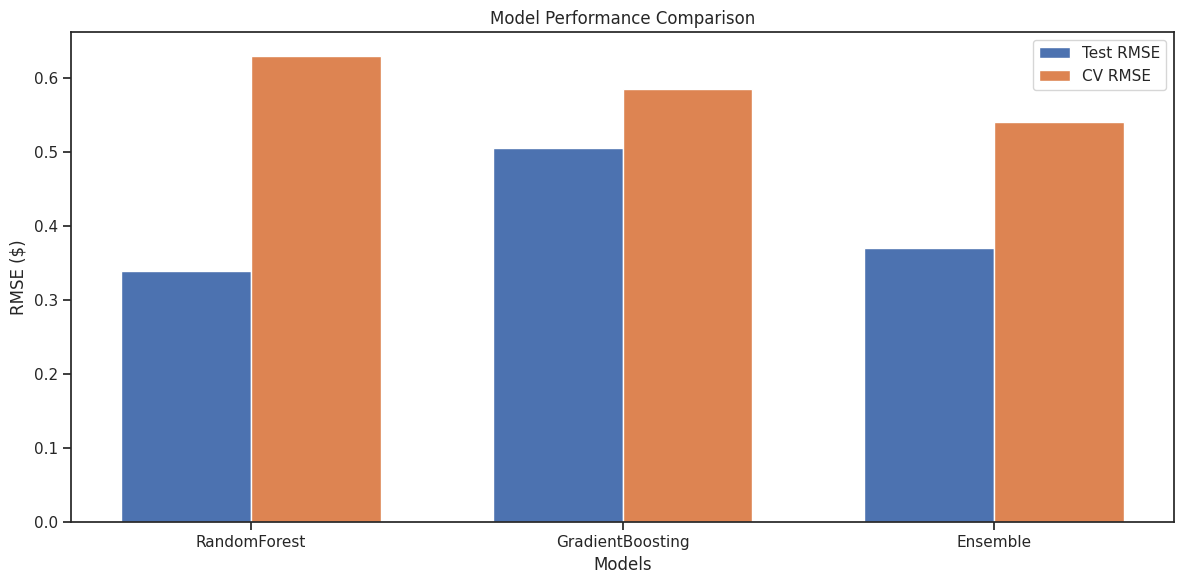


Final Model Performance Summary:
--------------------------------------------------

RandomForest:
Test RMSE: $0.34
CV RMSE: $0.63 ± $0.28
R² Score: 0.999

GradientBoosting:
Test RMSE: $0.51
CV RMSE: $0.59 ± $0.13
R² Score: 0.997

Ensemble:
Test RMSE: $0.37
CV RMSE: $0.54 ± $0.20
R² Score: 0.998
None


In [11]:
def visualize_model_performance(model_results):
    """
    Visualize model performance comparisons
    """
    print("\nCreating model performance visualizations...")

    # Prepare data for plotting
    models = list(model_results.keys())
    test_rmse = [results['test_rmse'] for results in model_results.values()]
    cv_rmse = [results['cv_rmse_mean'] for results in model_results.values()]

    # Create bar plot
    plt.figure(figsize=(12, 6))
    x = np.arange(len(models))
    width = 0.35

    plt.bar(x - width/2, test_rmse, width, label='Test RMSE')
    plt.bar(x + width/2, cv_rmse, width, label='CV RMSE')

    plt.xlabel('Models')
    plt.ylabel('RMSE ($)')
    plt.title('Model Performance Comparison')

    plt.xticks(x, models)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print final summary
    print("\nFinal Model Performance Summary:")
    print("-" * 50)
    for name, results in model_results.items():
        print(f"\n{name}:")
        print(f"Test RMSE: ${results['test_rmse']:.2f}")
        print(f"CV RMSE: ${results['cv_rmse_mean']:.2f} ± ${results['cv_rmse_std']:.2f}")
        print(f"R² Score: {results['test_r2']:.3f}")

# Visualize model performance
print(visualize_model_performance(model_results))


#Save Best Model and Make Predictions:


Best performing model: RandomForest


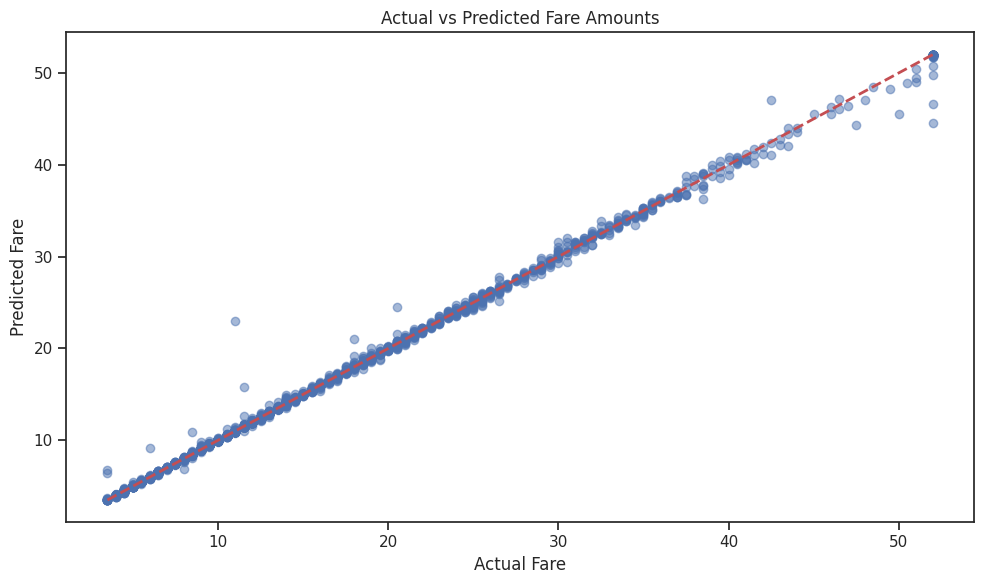


Sample Predictions vs Actual Values:
Actual: $6.50, Predicted: $6.49
Actual: $5.00, Predicted: $5.00
Actual: $12.50, Predicted: $12.51
Actual: $17.00, Predicted: $17.00
Actual: $9.00, Predicted: $9.04


In [12]:
def save_and_test_model(model_results, X_test, y_test):
    """
    Save the best model and make sample predictions
    """
    # Find the best model based on test RMSE
    best_model_name = min(model_results.items(),
                         key=lambda x: x[1]['test_rmse'])[0]
    best_model = model_results[best_model_name]['model']

    print(f"\nBest performing model: {best_model_name}")

    # Make predictions on test set
    y_pred = best_model.predict(X_test)

    # Create prediction vs actual plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Fare')
    plt.ylabel('Predicted Fare')
    plt.title('Actual vs Predicted Fare Amounts')
    plt.tight_layout()
    plt.show()

    # Print sample predictions
    print("\nSample Predictions vs Actual Values:")
    sample_idx = np.random.choice(len(y_test), 5)
    for idx in sample_idx:
        print(f"Actual: ${y_test.iloc[idx]:.2f}, Predicted: ${y_pred[idx]:.2f}")

    return best_model

# Save and test the best model
best_model = save_and_test_model(model_results, X_test, y_test)

#Automated EDA:

In [15]:


def perform_automated_eda_simple(df, output_dir="output"):
    """
    Perform automated Exploratory Data Analysis (EDA) using YData Profiling and Sweetviz.

    Parameters:
    df (pd.DataFrame): The input DataFrame to analyze.
    output_dir (str): Directory where the generated reports will be saved.

    Returns:
    tuple: A tuple containing the YData Profiling report and Sweetviz report objects.
    """
    print("Performing automated EDA...")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # 1. Generate a YData Profiling report to provide a comprehensive overview of the dataset
    print("\nGenerating YData Profiling Report...")
    profile = ProfileReport(df, title="Taxi Data Analysis Report", minimal=True)
    ydata_report_path = os.path.join(output_dir, "taxi_profiling_report.html")
    profile.to_file(ydata_report_path)  # Save the report to the output directory
    print(f"YData Profiling Report saved at: {ydata_report_path}")

    # 2. Generate a Sweetviz report to visualize dataset statistics
    print("\nGenerating Sweetviz Report...")
    sweet_report = sv.analyze(df)
    sweetviz_report_path = os.path.join(output_dir, "taxi_sweetviz_report.html")
    sweet_report.show_html(sweetviz_report_path)  # Save the Sweetviz report to the output directory
    print(f"Sweetviz Report saved at: {sweetviz_report_path}")

    # 3. Display basic dataset information in the console
    print("\nBasic Dataset Information:")
    print("-" * 50)
    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nNumerical Statistics:\n", df.describe())

    # Return both EDA report objects for potential further use
    return profile, sweet_report

# Main execution block
if __name__ == "__main__":
    print("Loading data...")

    # Load the dataset and parse datetime columns for proper analysis
    df = pd.read_csv(file_path,
                     parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

    # Define the output directory where reports will be saved
    output_directory = "/content/eda_reports"  # Adjust this path as needed for your system

    # Perform automated EDA and generate reports
    auto_eda_results = perform_automated_eda_simple(df, output_dir=output_directory)

    print(f"\nEDA completed. Reports saved in the directory: {output_directory}")


Loading data...
Performing automated EDA...

Generating YData Profiling Report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

YData Profiling Report saved at: /content/eda_reports/taxi_profiling_report.html

Generating Sweetviz Report...


                                             |          | [  0%]   00:00 -> (? left)

Report /content/eda_reports/taxi_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Sweetviz Report saved at: /content/eda_reports/taxi_sweetviz_report.html

Basic Dataset Information:
--------------------------------------------------

Shape: (22699, 18)

Columns: ['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

Missing Values:
 Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount     

#Manual Insights from Automated EDA:

In [16]:
def extract_manual_insights(df):
    """
    Extract and print manual insights from the dataset.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the taxi trip data.

    Returns:
    pd.DataFrame: The original DataFrame with added columns for derived insights.
    """
    print("\nExtracting key insights from the data:")
    print("-" * 50)

    # 1. Trip Statistics
    # Calculate and display average trip distance and fare amount to understand overall trip trends.
    print("\nTrip Statistics:")
    print(f"Average trip distance: {df['trip_distance'].mean():.2f} miles")
    print(f"Average fare amount: ${df['fare_amount'].mean():.2f}")

    # 2. Temporal Patterns
    # Extract the hour of pickup to analyze when trips are most frequent.
    # Group by hour to calculate the number of trips in each hour and identify the peak hour.
    df['hour'] = df['tpep_pickup_datetime'].dt.hour
    hourly_trips = df.groupby('hour').size()
    peak_hour = hourly_trips.idxmax()  # Find the hour with the maximum number of trips
    print(f"\nPeak hour for trips: {peak_hour}:00")

    # 3. Payment Patterns
    # Analyze the distribution of payment types to identify preferred payment methods (e.g., cash, card).
    payment_distribution = df['payment_type'].value_counts(normalize=True)
    print("\nPayment Type Distribution:")
    print(payment_distribution)  # Print the percentage distribution of payment types

    # 4. Distance-Fare Correlation
    # Calculate the correlation between trip distance and fare amount to understand pricing consistency.
    correlation = df['trip_distance'].corr(df['fare_amount'])
    print(f"\nCorrelation between distance and fare: {correlation:.3f}")

    # 5. Trip Duration Analysis
    # Calculate trip duration in minutes and analyze average trip time to assess travel patterns.
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    print(f"\nAverage trip duration: {df['trip_duration'].mean():.2f} minutes")

    # Return the modified DataFrame with additional calculated insights (e.g., 'hour', 'trip_duration').
    return df

# Extract manual insights from the dataset and add derived columns for further analysis
df_with_insights = extract_manual_insights(df)



Extracting key insights from the data:
--------------------------------------------------

Trip Statistics:
Average trip distance: 2.91 miles
Average fare amount: $13.03

Peak hour for trips: 19:00

Payment Type Distribution:
payment_type
1    0.672497
2    0.320146
3    0.005331
4    0.002027
Name: proportion, dtype: float64

Correlation between distance and fare: 0.757

Average trip duration: 17.01 minutes


#AutoML with PyCaret:

In [20]:
import pandas as pd
from pycaret.regression import setup, compare_models, tune_model, blend_models, finalize_model, plot_model, predict_model, save_model, pull

def prepare_data_for_automl(dataframe):
    """
    Prepares the taxi trip dataset for AutoML analysis by engineering features, cleaning data,
    and handling outliers.

    Parameters:
    dataframe (pd.DataFrame): Original dataset containing taxi trip data.

    Returns:
    pd.DataFrame: Processed dataset ready for AutoML.
    """
    print("Preparing data for AutoML...")

    # Create a copy of the dataframe to avoid modifying the original
    processed_df = dataframe.copy()

    # Generate time-based features from pickup datetime
    processed_df['pickup_hour'] = processed_df['tpep_pickup_datetime'].dt.hour
    processed_df['pickup_day_of_week'] = processed_df['tpep_pickup_datetime'].dt.dayofweek
    processed_df['pickup_month'] = processed_df['tpep_pickup_datetime'].dt.month

    # Calculate trip duration in minutes
    processed_df['trip_duration'] = ((processed_df['tpep_dropoff_datetime'] -
                                      processed_df['tpep_pickup_datetime']).dt.total_seconds() / 60).astype('float32')

    # Select relevant features for the AutoML process
    processed_df = processed_df[[
        'fare_amount',
        'trip_distance',
        'passenger_count',
        'payment_type',
        'RatecodeID',
        'pickup_hour',
        'pickup_day_of_week',
        'pickup_month',
        'trip_duration'
    ]].copy()

    # Convert numerical columns to float32 for better numerical stability
    numeric_columns = ['fare_amount', 'trip_distance', 'trip_duration']
    for column in numeric_columns:
        processed_df[column] = processed_df[column].astype('float32')

    # Filter out invalid or extreme values
    processed_df = processed_df[processed_df['trip_distance'] >= 0]
    processed_df = processed_df[processed_df['fare_amount'] > 0]
    processed_df = processed_df[processed_df['trip_duration'] > 0]

    # Remove outliers using the 1st and 99th percentiles
    for column in ['trip_distance', 'fare_amount', 'trip_duration']:
        lower_bound = processed_df[column].quantile(0.01)
        upper_bound = processed_df[column].quantile(0.99)
        processed_df = processed_df[(processed_df[column] >= lower_bound) & (processed_df[column] <= upper_bound)]

    print("Data preparation completed.")
    return processed_df


def run_automl_pipeline(processed_data):
    """
    Sets up and executes an AutoML pipeline to predict taxi fare amounts.

    Parameters:
    processed_data (pd.DataFrame): The cleaned and prepared dataset.

    Returns:
    tuple: The final trained model and a list of tuned models.
    """
    print("Setting up AutoML environment...")

    # Initialize the AutoML setup
    automl_setup = setup(data=processed_data,
                         target='fare_amount',
                         train_size=0.8,
                         categorical_features=['payment_type', 'RatecodeID'],
                         numeric_features=['trip_distance', 'passenger_count', 'pickup_hour',
                                           'pickup_day_of_week', 'pickup_month', 'trip_duration'],
                         fold=5,
                         session_id=42,
                         preprocess=True,
                         feature_selection=True)

    print("\nComparing models...")
    # Compare different models and select the top 3
    top_models = compare_models(n_select=3)

    print("\nTuning top models...")
    # Tune hyperparameters for the top 3 models
    tuned_models = [tune_model(model, n_iter=10) for model in top_models]

    print("\nCreating ensemble model...")
    # Blend the tuned models into an ensemble
    ensemble_model = blend_models(tuned_models)

    print("\nFinalizing model...")
    # Finalize the ensemble model
    final_model = finalize_model(ensemble_model)

    return final_model, tuned_models


def evaluate_model_performance(model, processed_data):
    """
    Evaluates the trained model's performance and generates interpretability plots.

    Parameters:
    model: The trained model to evaluate.
    processed_data (pd.DataFrame): The dataset used for evaluation.

    Returns:
    pd.DataFrame: Feature importance scores.
    """
    print("\nEvaluating model performance...")

    # Generate various evaluation plots
    plot_model(model, plot='feature')  # Feature importance
    plot_model(model, plot='error')  # Error distribution
    plot_model(model, plot='residuals')  # Residual plots

    # Display feature importance
    print("\nFeature Importance:")
    importance = model.feature_importances_
    print(importance)

    return importance


# Main execution block
print("Starting the taxi fare prediction AutoML pipeline...")

# Prepare the dataset for AutoML
prepared_data = prepare_data_for_automl(df)
print("\nPrepared data shape:", prepared_data.shape)

try:
    # Run the AutoML pipeline
    final_model, tuned_models = run_automl_pipeline(prepared_data)

    # Evaluate and interpret the final model
    feature_importance = evaluate_model_performance(final_model, prepared_data)

    # Make predictions with the final model
    predictions = predict_model(final_model)

    # Display model performance metrics
    print("\nFinal Model Performance Metrics:")
    print(pull())

    # Save the final model for future use
    save_model(final_model, 'taxi_fare_predictor')
    print("\nModel saved as 'taxi_fare_predictor'.")

except Exception as e:
    print(f"\nError during the AutoML process: {str(e)}")

    # Provide detailed debugging information
    print("\nDataset Information:")
    print(prepared_data.info())
    print("\nSample Data:")
    print(prepared_data.head())
    print("\nNumerical Statistics:")
    print(prepared_data.describe())


Starting the taxi fare prediction AutoML pipeline...
Preparing data for AutoML...
Data preparation completed.

Prepared data shape: (21632, 9)
Setting up AutoML environment...

Error during the AutoML process: underflow encountered in cast

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 21632 entries, 0 to 22698
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fare_amount         21632 non-null  float32
 1   trip_distance       21632 non-null  float32
 2   passenger_count     21632 non-null  int64  
 3   payment_type        21632 non-null  int64  
 4   RatecodeID          21632 non-null  int64  
 5   pickup_hour         21632 non-null  int32  
 6   pickup_day_of_week  21632 non-null  int32  
 7   pickup_month        21632 non-null  int32  
 8   trip_duration       21632 non-null  float32
dtypes: float32(3), int32(3), int64(3)
memory usage: 1.7 MB
None

Sample Data:
   fare_amount  t

In [29]:

from pycaret.regression import setup, compare_models, tune_model, blend_models, finalize_model, plot_model, predict_model, save_model, pull

# 1. Load and Prepare Data
print("Loading and preparing data...")
df = pd.read_csv(file_path, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])



Loading and preparing data...


In [56]:
# Create a copy of the dataframe for prediction
df_pred = df.copy()

In [30]:
# Feature engineering
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [31]:
# Select relevant features
df = df[[
    'fare_amount',
    'trip_distance',
    'passenger_count',
    'payment_type',
    'RatecodeID',
    'pickup_hour',
    'pickup_day_of_week',
    'pickup_month',
    'trip_duration'
]].copy()  # Use .copy() to avoid SettingWithCopyWarning

In [32]:
# Data cleaning and filtering
numeric_columns = ['fare_amount', 'trip_distance', 'trip_duration']
for column in numeric_columns:
    df[column] = df[column].astype('float32')

df = df[df['trip_distance'] >= 0]
df = df[df['fare_amount'] > 0]
df = df[df['trip_duration'] > 0]

for column in ['trip_distance', 'fare_amount', 'trip_duration']:
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [33]:
# Replace 0 values to avoid underflow
df.replace(0, 1e-6, inplace=True)

print("Data preparation completed.")
print("Shape of the dataset:", df.shape)

Data preparation completed.
Shape of the dataset: (21632, 9)


In [34]:
# 2. Setup PyCaret Environment
print("Setting up PyCaret environment...")
regression_setup = setup(
    data=df,
    target='fare_amount',
    train_size=0.8,
    categorical_features=['payment_type', 'RatecodeID'],
    numeric_features=['trip_distance', 'passenger_count', 'pickup_hour',
                      'pickup_day_of_week', 'pickup_month', 'trip_duration'],
    preprocess=True,
    feature_selection=True,
    session_id=42,
    numeric_imputation='median'  # Use median for imputation
)

Setting up PyCaret environment...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 17305, number of used features: 12
[LightGBM] [Info] Start training from score 12.092199


,Description,Value
0,Session id,42
1,Target,fare_amount
2,Target type,Regression
3,Original data shape,"(21632, 9)"
4,Transformed data shape,"(21632, 2)"
5,Transformed train set shape,"(17305, 2)"
6,Transformed test set shape,"(4327, 2)"
7,Numeric features,6
8,Categorical features,2
9,Preprocess,True


In [35]:
# 3. Compare and Select Models
print("\nComparing models...")
top_models = compare_models(n_select=3)


Comparing models...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.7827,9.4544,2.9965,0.8682,0.1735,0.1421,0.8980
lightgbm,Light Gradient Boosting Machine,1.7898,9.5071,3.0046,0.8675,0.1738,0.1424,0.4440
lr,Linear Regression,1.9026,9.8484,3.0707,0.8629,0.1877,0.1639,0.8220
lar,Least Angle Regression,1.9026,9.8484,3.0707,0.8629,0.1877,0.1639,0.2200
br,Bayesian Ridge,1.9026,9.8484,3.0707,0.8629,0.1877,0.1639,0.2160
ridge,Ridge Regression,1.9026,9.8484,3.0707,0.8629,0.1877,0.1639,0.2180
omp,Orthogonal Matching Pursuit,1.9026,9.8484,3.0707,0.8629,0.1877,0.1639,0.2940
llar,Lasso Least Angle Regression,1.9137,9.8974,3.0806,0.8622,0.1911,0.1689,0.3630
lasso,Lasso Regression,1.9137,9.8974,3.0806,0.8622,0.1911,0.1689,0.2910
en,Elastic Net,1.9449,10.0478,3.1095,0.8602,0.1955,0.1748,0.2210


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [36]:
# 4. Tune Hyperparameters
print("\nTuning top models...")
tuned_models = [tune_model(model, n_iter=10) for model in top_models]



Tuning top models...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0968,15.8347,3.9793,0.7631,0.1825,0.1363
1,1.6546,6.0230,2.4542,0.9169,0.1795,0.1548
2,1.6589,7.1515,2.6742,0.9047,0.1792,0.1482
3,1.6267,5.2358,2.2882,0.9229,0.1754,0.1526
4,1.5682,5.1931,2.2788,0.9378,0.1640,0.1428
5,1.6248,5.8490,2.4185,0.9115,0.1740,0.1510
6,2.0388,14.9918,3.8719,0.7974,0.1747,0.1326
7,1.9346,13.3461,3.6532,0.8023,0.1649,0.1310
8,2.0892,15.5419,3.9423,0.7904,0.1724,0.1340


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1002,15.7839,3.9729,0.7638,0.1811,0.1363
1,1.6412,5.8951,2.4280,0.9186,0.1787,0.1540
2,1.6373,6.9520,2.6367,0.9074,0.1771,0.1458
3,1.6048,5.1061,2.2597,0.9248,0.1720,0.1494
4,1.5420,4.9618,2.2275,0.9406,0.1620,0.1406
5,1.6140,5.7709,2.4023,0.9127,0.1731,0.1496
6,2.0150,14.4834,3.8057,0.8043,0.1727,0.1318
7,1.9109,12.7572,3.5717,0.8110,0.1609,0.1295
8,2.0566,15.1481,3.8921,0.7957,0.1681,0.1310


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2105,15.8763,3.9845,0.7625,0.1921,0.1535
1,1.7512,6.4242,2.5346,0.9113,0.1976,0.1810
2,1.7534,7.4739,2.7338,0.9004,0.1909,0.1685
3,1.7348,5.6643,2.3800,0.9166,0.1883,0.1742
4,1.6844,5.6799,2.3833,0.9320,0.1818,0.1663
5,1.7164,6.2124,2.4925,0.9060,0.1891,0.1718
6,2.1661,14.9123,3.8616,0.7985,0.1864,0.1535
7,2.0219,12.9038,3.5922,0.8088,0.1719,0.1464
8,2.1723,15.3432,3.9170,0.7931,0.1797,0.1497


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [37]:
# 5. Blend Models (Ensemble)
print("\nCreating ensemble model...")
ensemble_model = blend_models(tuned_models)


Creating ensemble model...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1079,15.7139,3.9641,0.7649,0.1815,0.1366
1,1.6555,5.9319,2.4356,0.9181,0.1818,0.1606
2,1.6537,6.9729,2.6406,0.9071,0.1784,0.1511
3,1.6227,5.1491,2.2692,0.9242,0.1748,0.1556
4,1.5626,5.0539,2.2481,0.9395,0.1656,0.1470
5,1.6274,5.7724,2.4026,0.9127,0.1754,0.1550
6,2.0361,14.5358,3.8126,0.8035,0.1738,0.1334
7,1.9137,12.6996,3.5636,0.8118,0.1610,0.1290
8,2.0644,15.0597,3.8807,0.7969,0.1683,0.1316


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [48]:
# 6. Finalize Model
print("\nFinalizing model...")
final_model = finalize_model(ensemble_model)


Finalizing model...


In [53]:

# Save model
save_model(final_model, 'taxi_fare_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['trip_distance', 'passenger_count',
                                              'pickup_hour',
                                              'pickup_day_of_week',
                                              'pickup_month', 'trip_duration'],
                                     transformer=SimpleImputer(strategy='median'))),
                 ('categorical_imputer',
                  TransformerWrapper(include=['payment_type', 'RatecodeID'],
                                     transformer=SimpleImputer(st...
                  VotingRegressor(estimators=[('Gradient Boosting Regressor',
                                               GradientBoostingRegressor(random_state=42)),
                                              ('Light Gradient Boosting Machine',
                                               LGBMRegressor(bagging_fraction=0.6,
                       

In [57]:
# Prepare prediction data with same features
pred_features = ['trip_distance', 'passenger_count', 'payment_type', 'RatecodeID',
                'pickup_hour', 'pickup_day_of_week', 'pickup_month', 'trip_duration']
df_pred = df_pred[pred_features]

In [58]:
# Make predictions
predictions = predict_model(final_model, data=df_pred)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


In [59]:

print("Shape of predictions:", predictions.shape)
print("\nFirst few predictions:")
print(predictions.head())

Shape of predictions: (21632, 9)

First few predictions:
   trip_distance  passenger_count  payment_type  RatecodeID  pickup_hour  \
0      3.34             6.0              1            1          8.0       
1      1.80             1.0              1            1         14.0       
2      1.00             1.0              1            1          7.0       
3      3.70             1.0              1            1         13.0       
4      4.37             1.0              2            1         23.0       

   pickup_day_of_week  pickup_month  trip_duration  prediction_label  
0          5.0               3         14.066667        14.755151     
1          1.0               4         26.500000         9.858779     
2          4.0              12          7.200000         7.144965     
3          6.0               5         30.250000        15.924347     
4          5.0               4         16.716667        17.790989     
